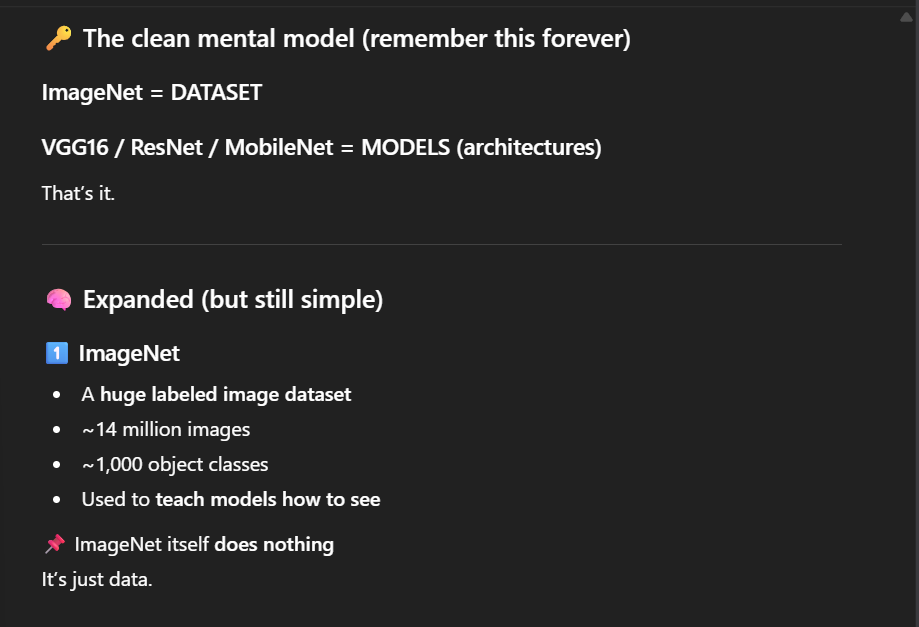

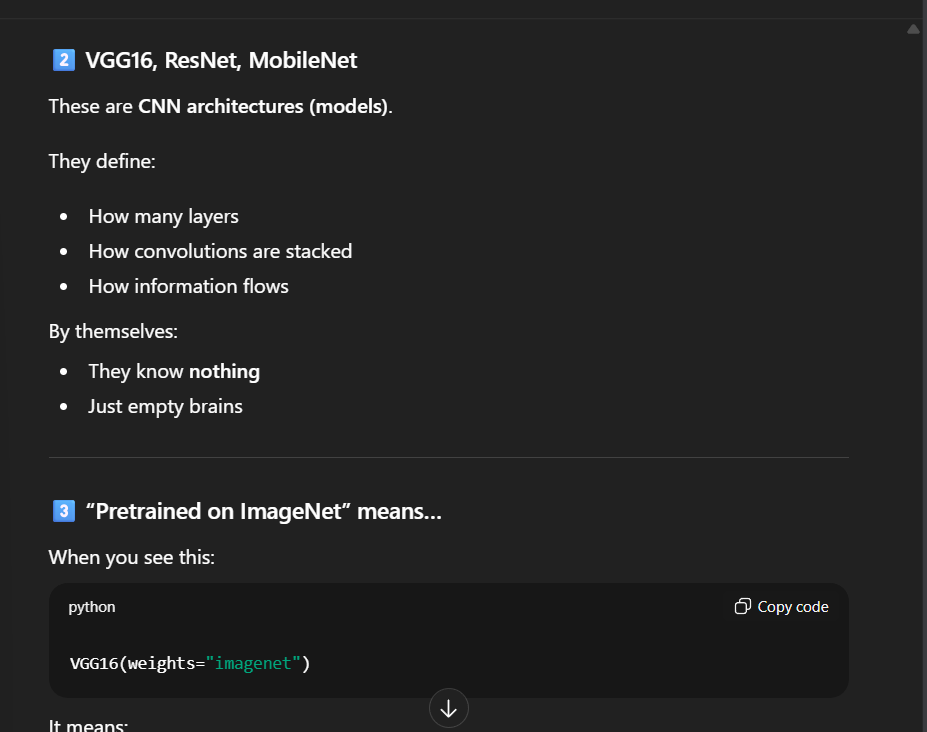

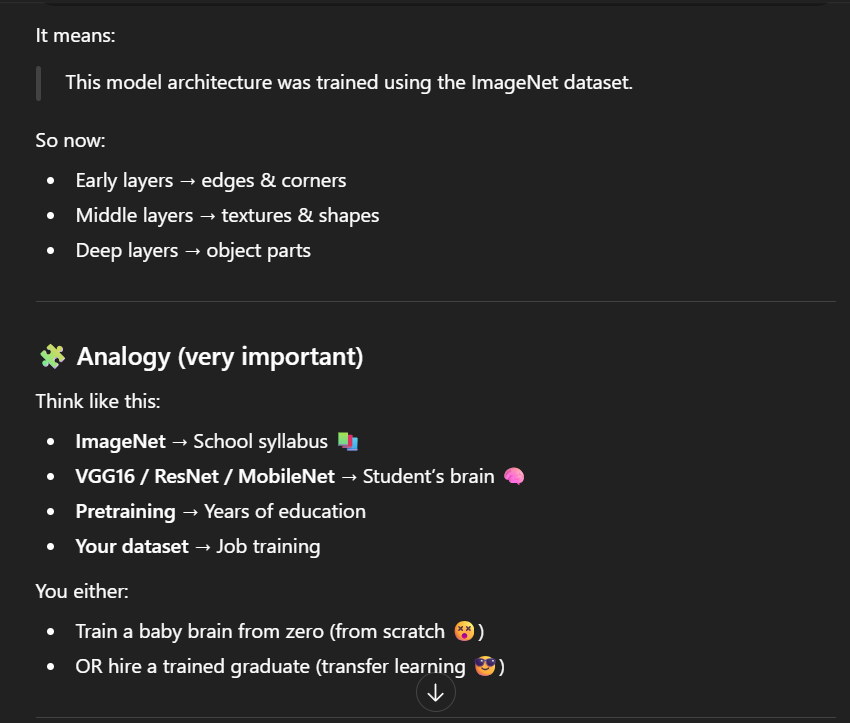

In [42]:
# Small dataset + learning → VGG16
# High accuracy + GPU → ResNet
# Limited GPU + deployment → MobileNet

# libaries importing

In [43]:
import os
import re
import tensorflow as tf
import numpy as np
import joblib

In [44]:
img_size=(224,224)
batch_size=32

In [45]:
datset_dir=r"C:\Users\sachi\Desktop\desktop\deepLearning\06 Transfer learning\images"

# extacting all filenames

In [46]:
all_images=[os.path.join(datset_dir,fname)
            for fname in os.listdir(datset_dir)
            if fname.lower().endswith(".jpg")]
print(f"total images: {len(all_images)}")

total images: 7390


In [47]:
all_images

['C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_1.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_10.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_100.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_101.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_102.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_103.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_104.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_105.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_106.jpg',
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\im

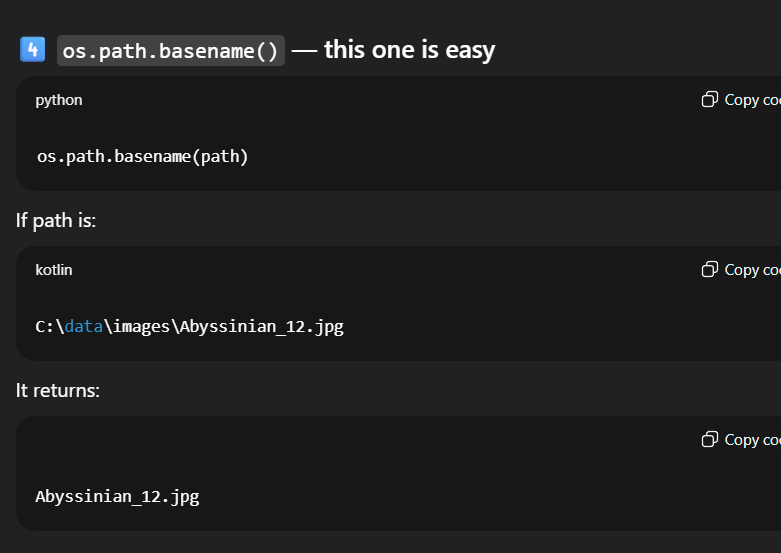

# extracting main name of file to label

In [48]:
os.path.basename(all_images[0])

'Abyssinian_1.jpg'

In [49]:
def extract_breed(filename):
    return "_".join(filename.split("_")[:-1])

In [50]:
print(extract_breed("Abyssinian_12.jpg"))
print(extract_breed("american_bulldog_101.jpg"))

Abyssinian
american_bulldog


# Build label mappings

In [51]:
breeds = sorted(list(set(extract_breed(os.path.basename(p)) for p in all_images)))
num_classes = len(breeds)

print("Number of classes:", num_classes)
print(breeds[:5])


Number of classes: 37
['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair']


In [52]:
breed_to_label = {breed: idx for idx, breed in enumerate(breeds)}
label_to_breed = {idx: breed for breed, idx in breed_to_label.items()}
print(breed_to_label,label_to_breed)

{'Abyssinian': 0, 'Bengal': 1, 'Birman': 2, 'Bombay': 3, 'British_Shorthair': 4, 'Egyptian_Mau': 5, 'Maine_Coon': 6, 'Persian': 7, 'Ragdoll': 8, 'Russian_Blue': 9, 'Siamese': 10, 'Sphynx': 11, 'american_bulldog': 12, 'american_pit_bull_terrier': 13, 'basset_hound': 14, 'beagle': 15, 'boxer': 16, 'chihuahua': 17, 'english_cocker_spaniel': 18, 'english_setter': 19, 'german_shorthaired': 20, 'great_pyrenees': 21, 'havanese': 22, 'japanese_chin': 23, 'keeshond': 24, 'leonberger': 25, 'miniature_pinscher': 26, 'newfoundland': 27, 'pomeranian': 28, 'pug': 29, 'saint_bernard': 30, 'samoyed': 31, 'scottish_terrier': 32, 'shiba_inu': 33, 'staffordshire_bull_terrier': 34, 'wheaten_terrier': 35, 'yorkshire_terrier': 36} {0: 'Abyssinian', 1: 'Bengal', 2: 'Birman', 3: 'Bombay', 4: 'British_Shorthair', 5: 'Egyptian_Mau', 6: 'Maine_Coon', 7: 'Persian', 8: 'Ragdoll', 9: 'Russian_Blue', 10: 'Siamese', 11: 'Sphynx', 12: 'american_bulldog', 13: 'american_pit_bull_terrier', 14: 'basset_hound', 15: 'beagle

# Create arrays of paths & labels

In [53]:
image_paths = []
labels = []

for path in all_images:
    breed = extract_breed(os.path.basename(path))
    image_paths.append(path)
    labels.append(breed_to_label[breed])

image_paths = np.array(image_paths)
labels = np.array(labels)
print(image_paths)


['C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_1.jpg'
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_10.jpg'
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\Abyssinian_100.jpg'
 ...
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\yorkshire_terrier_97.jpg'
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\yorkshire_terrier_98.jpg'
 'C:\\Users\\sachi\\Desktop\\desktop\\deepLearning\\06 Transfer learning\\images\\yorkshire_terrier_99.jpg']


In [54]:
metadata = {
    "image_paths": image_paths,
    "labels": labels,
    "breed_to_label": breed_to_label,
    "label_to_breed": label_to_breed,
    "num_classes": num_classes,
    "img_size": img_size,
    "batch_size": batch_size
}

joblib.dump(metadata, "metadata.pkl")
print("metadata.pkl saved successfully")


metadata.pkl saved successfully
